In [144]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import cm 
from scipy.special import gamma as GAMMA, factorial, beta as BETA 
import math

In [145]:
class Solution:
    
    def __init__(self, N = None, T = None, h = None, tau = None, L = None):
        self.N = N
        self.T = T
        self.h = h
        self.tau = tau
        self.L = L
        self.result = []
        
    def load(self, file_name : str, params = None):
        with open(file_name, "r") as file:
            if params is None:
                self.N = int(file.readline())
                self.T = int(file.readline())
                self.h, self.tau, self.L = float(file.readline()), float(file.readline()), float(file.readline())
            else:
                self.N, self.T, self.h, self.tau, self.L = params
                
            for i in range(self.T):
                s = file.readline()
                a = s[:-1].strip().split(" ")

                self.result.append([float(num) for num in a])
        
        return self
    
    def draw(self, colums, rows, decision = None, figsize=(16, 5)):
        all_count = colums * rows
        step = (len(self.result) - 1) // (all_count - 1)

        fig, ax = plt.subplots(rows, colums, figsize=figsize)

        X_decision = np.linspace(self.L, self.L + self.h * self.N, self.N)
        X1 = np.array([self.L + self.h*i for i in range(self.N)])

        for kk in range(0, all_count):

            # TIME1 = np.array([tau1*kk*step for i in range(len(res[0][0]))])
            # TIME2 = np.array([tau2*kk*step for i in range(len(res[1][0]))])
            TIME_decision = np.array([self.tau + self.tau*kk*step] * len(X_decision))

            if not decision == None:
                ax[kk // colums, kk % colums].plot(X_decision, decision(X_decision, TIME_decision))
            # for solution in range(len(res)):
            ax[kk // colums, kk % colums].plot(X1, self.result[1:][kk*step], '.-', linewidth = 1)
            ax[kk // colums, kk % colums].set_title(f"{kk*step} (t = {self.tau*kk*step})")
            
        plt.show()
        
    def draw_num(self, colums, rows, decision = None, figsize=(16, 5)):
        all_count = colums * rows
        step = (len(self.result) - 1) // (all_count - 1)

        fig, ax = plt.subplots(rows, colums, figsize=figsize)

        X1 = np.array([self.L + self.h*i for i in range(self.N)])

        for kk in range(0, all_count):
            
            if not decision == None:
                ax[kk // colums, kk % colums].plot(X1, np.array(decision.result)[1:][kk*step])
            
            ax[kk // colums, kk % colums].plot(X1, self.result[1:][kk*step], '.-', linewidth = 1)
            ax[kk // colums, kk % colums].set_title(f"{kk*step} (t = {self.tau*kk*step})")
            
        plt.show()
        
    def draw_all(self, kk, decision = None, figsize=(16, 5)):
        plt.rcParams['text.usetex'] = True
        
        fig, ax = plt.subplots(1, 1, figsize=figsize)

        X_decision = np.linspace(self.L, self.L + self.h * self.N, self.N)
        X1 = np.array([self.L + self.h*i for i in range(self.N)])

            
        TIME_decision = np.array([self.tau + self.tau*kk] * len(X_decision))
        
        ax.plot(X1, self.result[1:][kk], '.-', linewidth = 0.8, label=r"\textbf{$u_{true}(x, t)$}")
        
        if not decision == None:
            for dec in decision:
                if type(dec) is Solution:
                    ax.plot(X1, np.array(dec.result)[1:][kk], \
                            '--', linewidth = 1.0, label=r"\textbf{abnormal numerical dec. $u(x, t)$}")
                else:
                    ax.plot(X_decision, dec(X_decision, TIME_decision), \
                            '.--', linewidth = 0.5, label=r"\textbf{normal numerical dec. $u(x, t)$}")

        
        ax.set_title(f"{kk} (t = {self.tau*kk})")
            
        plt.legend()
        plt.show()
    
    def error(self, decision):
        XX = np.linspace(self.L, self.L + self.h * self.N, self.N)
        TT = np.linspace(self.tau, self.tau * self.T, self.T - 1)
        XX, TT = np.meshgrid(XX, TT)
        ZZ = decision(XX, TT)
        res = np.array(self.result)[1:]
        
        max_x = np.power(ZZ - res, 2.0)
        min_max_x = np.sum(max_x)
        err = min_max_x
        return err
    
    def error_num(self, decision):
        XX = np.linspace(self.L, self.L + self.h * self.N, self.N)
        TT = np.linspace(self.tau, self.tau * self.T, self.T - 1)
        XX, TT = np.meshgrid(XX, TT)
        ZZ = np.array(decision.result)[1:]
        res = np.array(self.result)[1:]
        
        max_x = np.power(ZZ - res, 2.0)
        min_max_x = np.sum(max_x)
        err = min_max_x
        return err
    
    def plot3D(self, decision, vmax = None):
        XX = np.linspace(self.L, self.L + self.h * self.N, self.N)
        TT = np.linspace(self.tau, self.tau * self.T, self.T - 1)
        XX, TT = np.meshgrid(XX, TT)
        ZZ = decision(XX, TT)
        
        res = np.array(self.result)[1:]

        fig = plt.figure(figsize=(16,8))
        ax1 = fig.add_subplot(2, 4, (1, 5), projection = "3d")
        ax2 = fig.add_subplot(2, 4, (2, 6), projection = "3d")
        ax3 = fig.add_subplot(2, 4, (3,4))
        ax4 = fig.add_subplot(2, 4, (7,8))

        ax1.plot_surface(XX, TT, ZZ, cmap=cm.coolwarm, linewidth=0, antialiased=False)
        ax1.view_init(40, -60)

        ax2.plot_surface(XX, TT, res, cmap='viridis', linewidth=0, antialiased=False)
        ax2.view_init(40, -60)

        cf = ax3.contourf(XX, TT, np.abs(ZZ - res), self.N, cmap=cm.coolwarm, vmax = vmax)
        fig.colorbar(cf)

        ax4.plot(TT[100:], np.max(np.abs(ZZ - res)[100:], 1) )

        plt.title(f"eps = {self.error(decision)}")
        
        plt.show()
        
    def plot3D_num(self, decision, vmax = None):
        slice_t = 200
        XX = np.linspace(self.L, self.L + self.h * self.N, self.N)
        TT = np.linspace(slice_t * self.tau, self.tau * self.T, self.T - slice_t)
        XX, TT = np.meshgrid(XX, TT)
        ZZ = np.array(decision.result)[slice_t:]
        
        res = np.array(self.result)[slice_t:]

        fig = plt.figure(figsize=(16,12))
        ax1 = fig.add_subplot(2, 4, (1, 2), projection = "3d")
        ax2 = fig.add_subplot(2, 4, (3, 4), projection = "3d")
        ax3 = fig.add_subplot(2, 4, (5,6))
        ax4 = fig.add_subplot(2, 4, (7,8))

        ax1.plot_surface(XX, TT, ZZ, cmap=cm.coolwarm, linewidth=0, antialiased=False)
        ax1.view_init(40, -60)

        ax2.plot_surface(XX, TT, res, cmap='viridis', linewidth=0, antialiased=False)
        ax2.view_init(40, -60)

        cf = ax3.contourf(XX, TT, np.abs(ZZ - res), self.N, cmap=cm.coolwarm, vmax = vmax)
        fig.colorbar(cf)

        ax4.plot(TT[100:], np.max(np.abs(ZZ - res)[100:], 1) )

        plt.title(f"eps = {self.error_num(decision)}")
        
        plt.show()

In [146]:
canal_without_crack = "task/canal/canal_map.txt"
canal_with_crack = "task/canal_with_crack/canal_with_crack_map.txt"

result_task_normal_diffusion = Solution().load(canal_without_crack, [200, 1000, 0.005, 0.001, -0.5])
result_task_abnormal_diffusion = Solution().load(canal_with_crack, [200, 1000, 0.005, 0.001, -0.5])

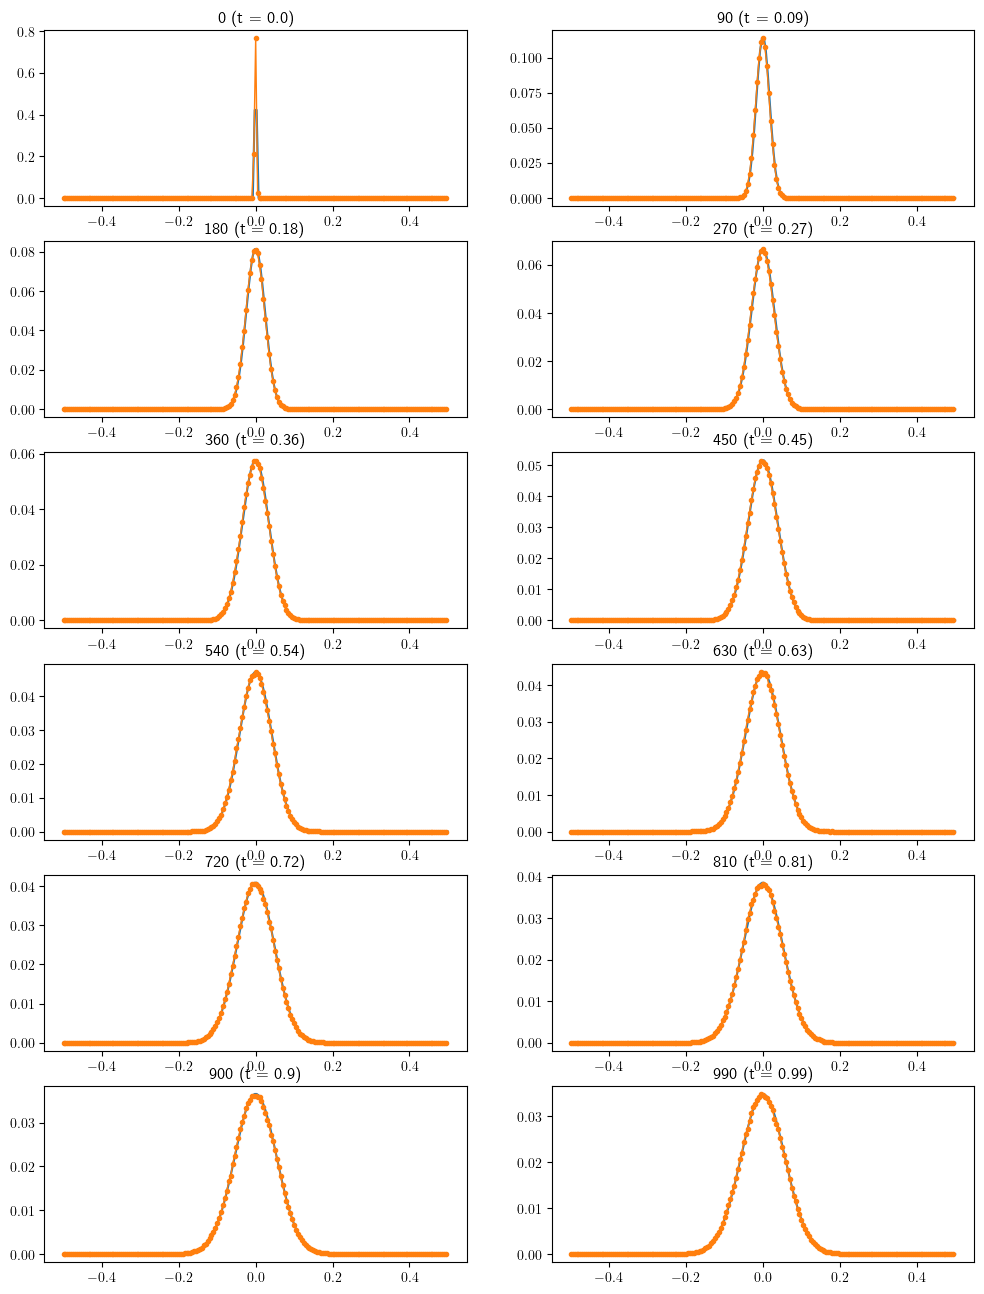

In [147]:
def decision(x, t):
    sig2 = lambda t : 4 * .00165 * t
    res = 0.005 * np.exp(-(x)**2 / sig2(t)) / np.sqrt(math.pi * sig2(t))
    
    return res

result_task_normal_diffusion.draw(2, 6, decision, figsize=(12,16))

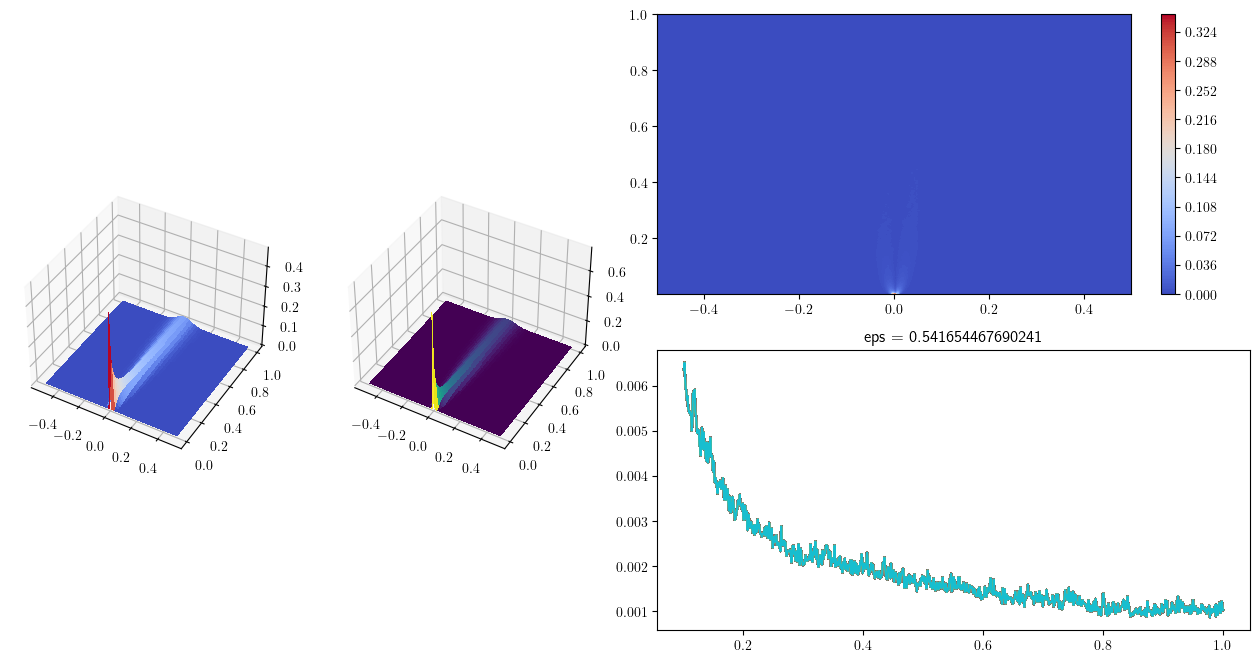

In [148]:
result_task_normal_diffusion.plot3D(decision)

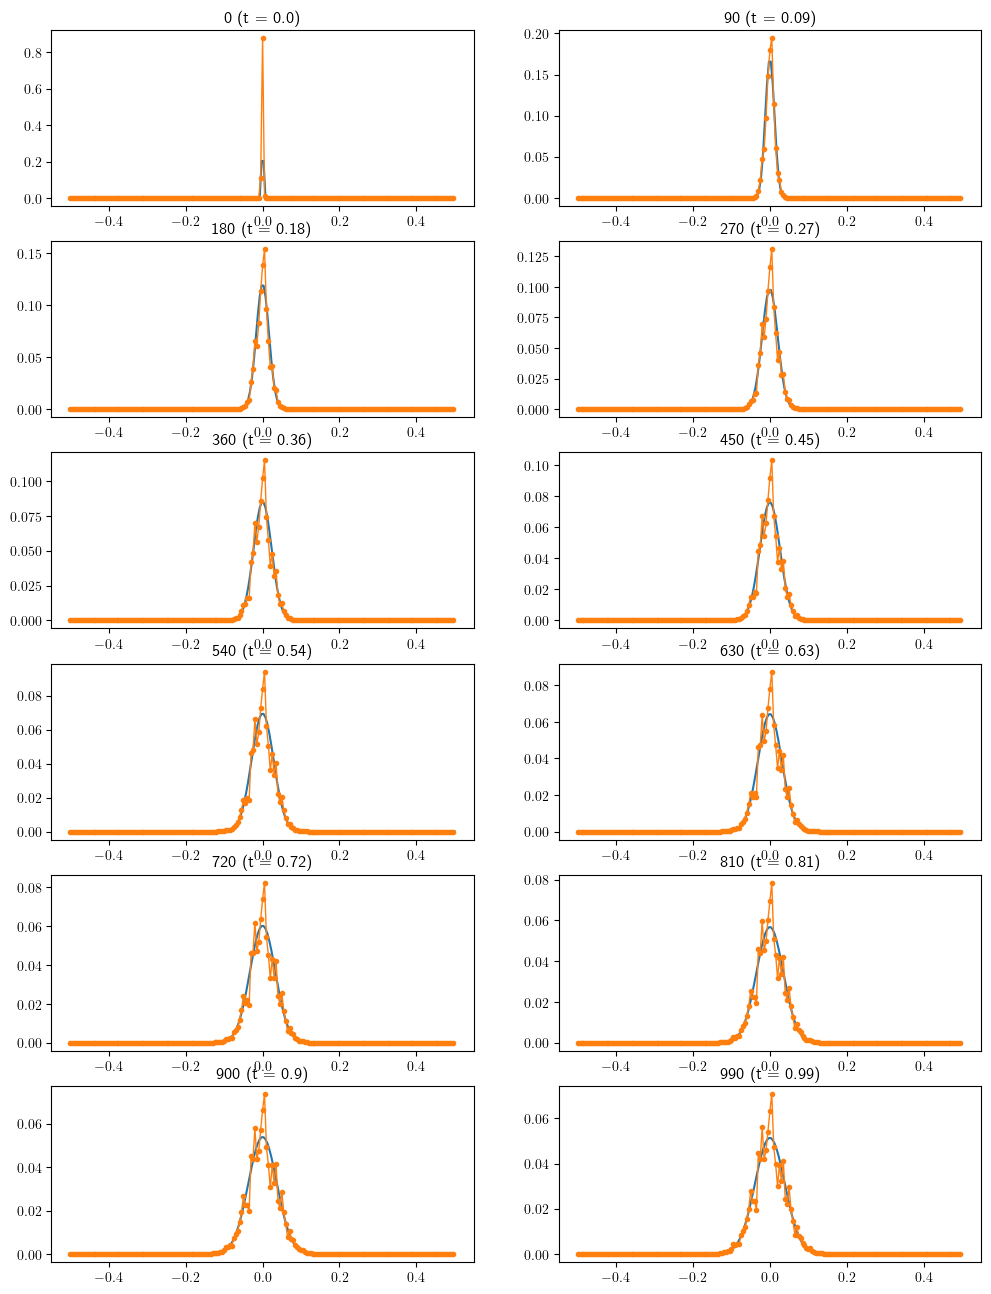

In [149]:
def decision(x, t):
    sig2 = lambda t : 4 * 0.00076 * t
    res = 0.005 * np.exp(-(x)**2 / sig2(t)) / np.sqrt(math.pi * sig2(t))
    
    return res

result_task_abnormal_diffusion.draw(2, 6, decision, figsize=(12,16))

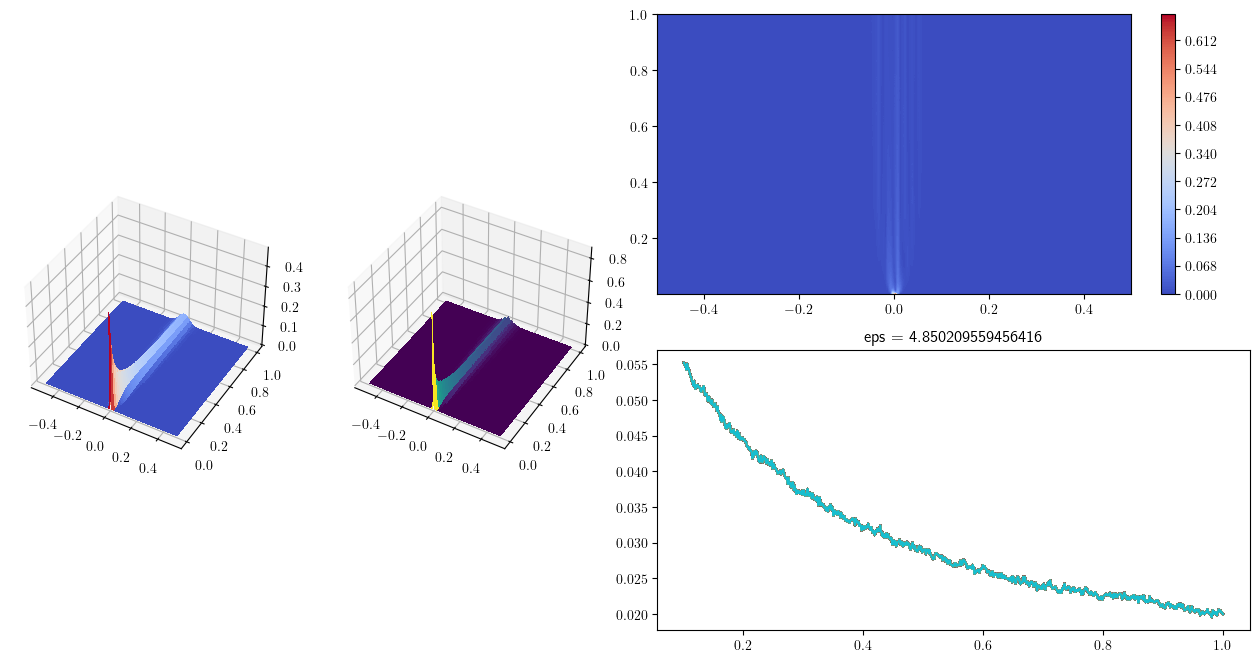

In [150]:
result_task_abnormal_diffusion.plot3D(decision)

In [151]:
# def err(D):
#     def decision(x, t):
#         sig2 = lambda t : 4 * D * t
#         res = 0.005 * np.exp(-(x)**2 / sig2(t)) / np.sqrt(math.pi * sig2(t))

#         return res

#     return result_task_abnormal_diffusion.error(decision)

In [152]:
# phi = (1+np.sqrt(5)) / 2
# a, b = 0.0, 1.0

# for i in range(50):
    
#     d1, d2 = b - (b - a) / phi, a + (b - a) / phi
    
#     if err(d1) >= err(d2):
#         a = d1
#     else:
#         b = d2
        
# print(a, b)

In [153]:
canal_with_crack_num = "out.txt"

result_task_abnormal_diffusion_num = Solution().load(canal_with_crack_num)

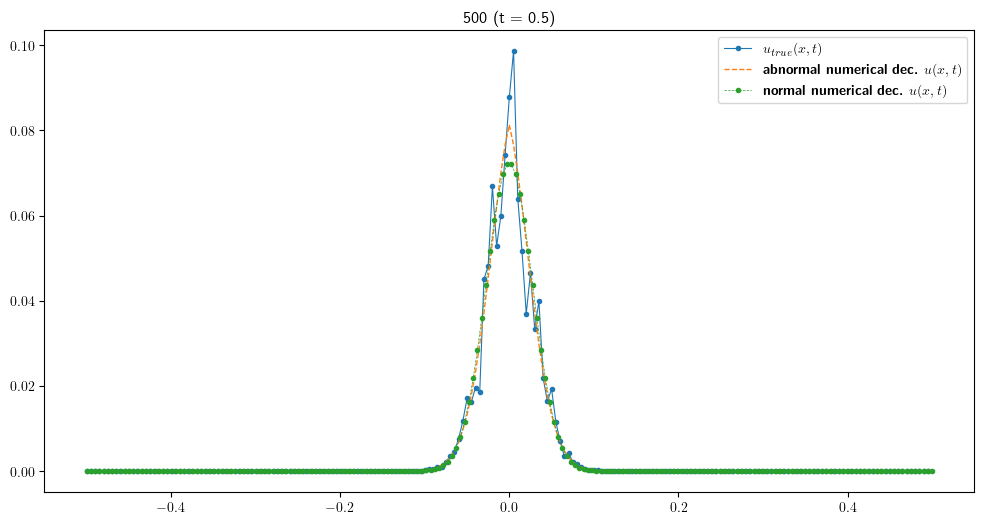

In [154]:
result_task_abnormal_diffusion.draw_all(500, [result_task_abnormal_diffusion_num, decision], figsize=(12,6))

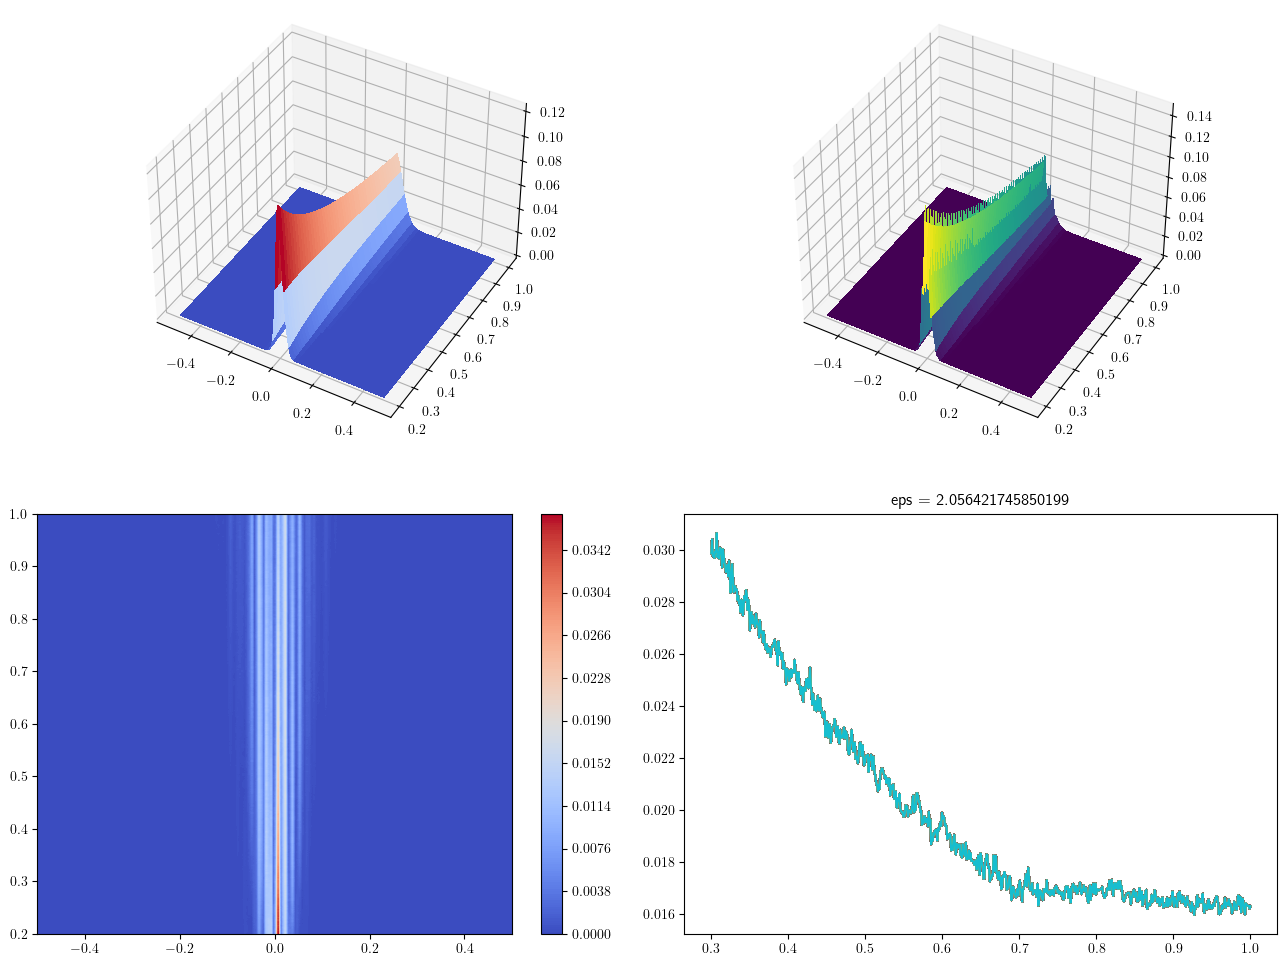

In [155]:
result_task_abnormal_diffusion.plot3D_num(result_task_abnormal_diffusion_num)

In [156]:
xl, xh, xg = np.array([85, 70]), np.array([82.75, 68.75]), np.array([90, 75])

print(f"{xl} = xl")
print(f"{xh} = xh")
print(f"{xg} = xg")

[85 70] = xl
[82.75 68.75] = xh
[90 75] = xg


In [157]:
xc = 0.5 * (xl + xg)
xr = xl + xg - xh
xs = 0.5*(xh + xc)

print(f"{xc} = xc")
print(f"{xr} = xr")
print(f"{xs} = xs")

[87.5 72.5] = xc
[92.25 76.25] = xr
[85.125 70.625] = xs
